# Template Matching

If you've ever wondered how computers can identify specific patterns or objects within images, you're in the right place. In this blog post, we will guide you through the fundamental principles, techniques, and practical applications of template matching. But first, we have to understand what template matching is. It is an effective approach employed in image detection, recognition, and object tracking, involving the identification of a reference image (known as the template image) within a larger image (known as the source image). The algorithm behind template matching is intuitive, as it compares the template with each section of the source image by systematically sliding it one pixel at a time. This process generates another image or matrix where each pixel value represents the degree of similarity between the template and the corresponding region in the source image. By examining the resulting image, we can identify peaks that indicate the locations in the source image where the template image is present. It is worth noting that actual implementations of template matching may vary in terms of the similarity measurement used and the methods employed for efficient multiple comparisons.

To illustrate this point, let's take the image of a deck of cards as a specific example. Our goal is to locate and count the number of diamonds present in our deck.

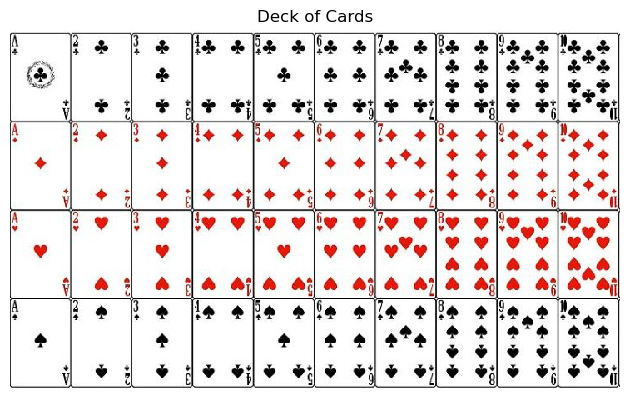

In [89]:
from skimage.io import imread, imshow
cards = imread('card_deck.JPG')
plt.axis('off')
plt.title('Deck of Cards')
imshow(cards);

While template matching can be applied to color images, it is more straightforward when working with grayscale or binarized images. Therefore, for the purpose of this example, we will focus on using a grayscale image. By working with grayscale or binarized images, we eliminate the complexity associated with handling multiple color channels, making the template matching process easier to understand and implement. So, let's explore template matching using a grayscale image for a simplified and clearer demonstration.

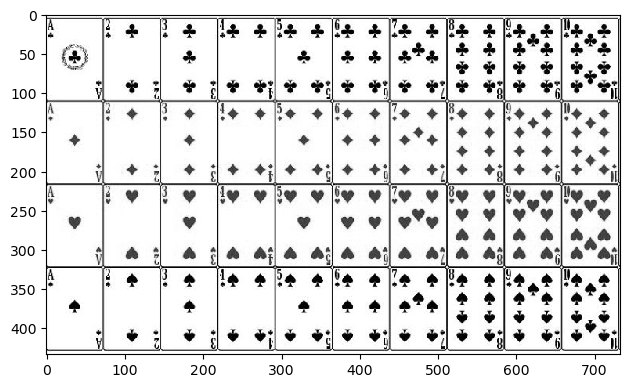

In [87]:
from skimage.color import rgb2gray

cards_gray = rgb2gray(cards)
imshow(cards_gray);

Let's now select one of the diamonds to be our template.

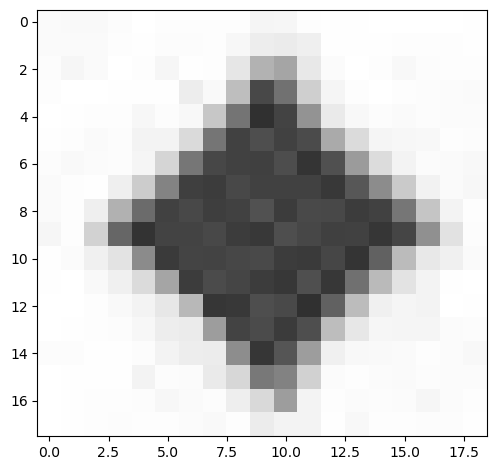

In [93]:
template = cards_gray[118:136,100:119]
imshow(template);

To carry out template matching, we utilize the function "match_template." To read more about this function, visit the documentation here: https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_template.html

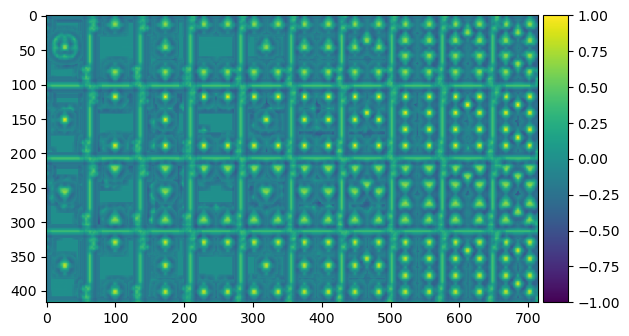

In [94]:
from skimage.feature import match_template
result = match_template(cards_gray, template)
imshow(result, cmap='viridis');

By observing the image, we can identify multiple regions with vivid colors. Assuming that the template appears only once within the source image, we can determine its location by identifying the pixel with the highest value.

In [95]:
import numpy as np
x, y = np.unravel_index(np.argmax(result), result.shape)
print((x, y))

(118, 100)


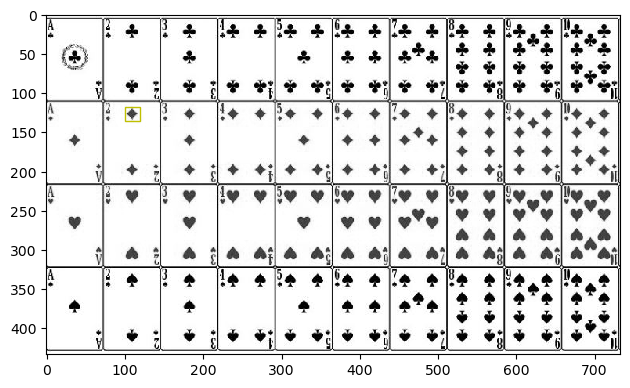

In [96]:
import matplotlib.pyplot as plt
imshow(cards_gray)
template_width, template_height = template.shape
rect = plt.Rectangle((y, x), template_height, template_width, color='y', 
                     fc='none')
plt.gca().add_patch(rect);

In order to find multiple instances of a template, we search for peaks in the correlation results that surpass a specific threshold value. To read more about this function, read this: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_peak_local_max.html

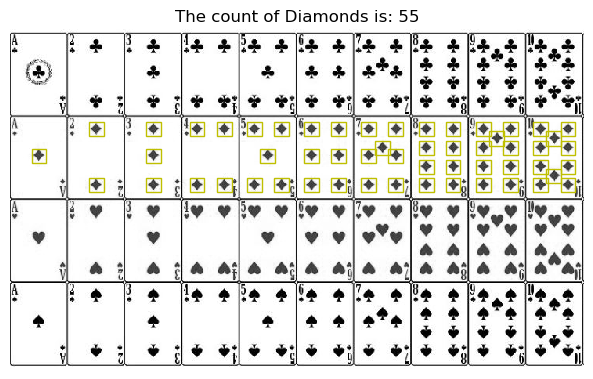

In [98]:
from skimage.feature import peak_local_max
imshow(cards_gray)
template_width, template_height = template.shape

rect_counter = 0
for i, (x, y) in enumerate(peak_local_max(result, threshold_abs=0.9)):
    rect = plt.Rectangle((y, x), template_height, template_width, color='y', 
                         fc='none')
    rect_counter += 1
    plt.gca().add_patch(rect);
    
plt.axis('off')
plt.title(f'The count of Diamonds is: {rect_counter}');

By employing template matching, we successfully accomplished the task of locating and counting the number of diamonds within our deck of cards. The template matching algorithm systematically compared the diamond template image with various regions of the card deck image. As a result, we obtained correlation scores or similarity values for each comparison. By setting a suitable threshold, we were able to identify peaks in the correlation results that exceeded the specified value. Each peak corresponded to a matching instance of the diamond template, allowing us to determine both the location and count of diamonds present in the deck of cards. This demonstrates how template matching can be applied to solve practical problems such as object detection and counting within diverse visual datasets.